<a href="https://colab.research.google.com/github/Mengxue12/Maching_Learning/blob/main/lab02/ml02-exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD exercise

Using the MNIST dataset containing hand-written digits, do the following:

- [ ] single image compression using truncated SVD
- [ ] svd on whole dataset containing digits using 'eigendigits' space
- [ ] 2D visualization of MNIST digits dataset

In [ ]:
# !pip3 install keras --user --upgrade --quiet

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd

pd.set_option('precision', 3)
np.set_printoptions(precision=3)

## First steps

In the following code, the MNIST digit data is loaded from a keras library,
which contains a train/test split already. Then, the first digits are shown
just to have a sense of what these images look like. 

Notice that this dataset is labelled, that is we have a label for each image, which is basically the digit it represents. You could use this information for the final visualization to see how different digits are projected and whether there is some consistency in the places where you find different digits.

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


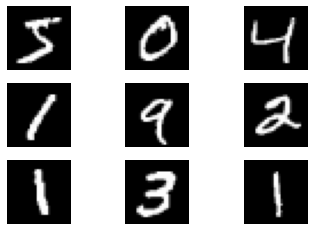

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
 
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.cm.gray)
    plt.axis('off')

In [4]:
train_X.shape

(60000, 28, 28)

In [8]:
train_X[1].shape

(28, 28)

In [4]:
import numpy as np
from numpy.linalg import svd
U,d,Vt = svd(train_X[1])
D = np.diag(d)

np.allclose(train_X[1], U @ D @ Vt)

True

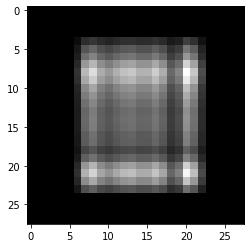

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

k = 1
plt.imshow(U[:,:k] @ D[:k,:k] @ Vt[:k,:], cmap=plt.cm.gray)

In [20]:
n = train_X.shape[0]
h = train_X.shape[1]
w = train_X.shape[2]
X = np.zeros((n, h*w))
for i, row in enumerate(train_X):
    # load, remove three channels, convert to numpy array
    X[i,:] = row.reshape(1 , -1) # place flat image in position


(60000, 28, 28)


In [21]:
print(X.shape)

(60000, 784)


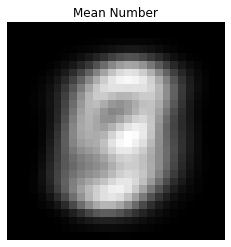

In [23]:
mean_num = X.mean(axis=0)
plt.imshow(np.reshape(mean_num, (h,w)), cmap=plt.cm.gray)
plt.title("Mean Number")
plt.axis('off')
plt.show()

In [24]:
cX = X - mean_num


In [25]:
%%time
U, d, Vt = svd(cX, full_matrices=False)

CPU times: user 20.2 s, sys: 1.65 s, total: 21.9 s
Wall time: 11.9 s


In [26]:
U.shape, d.shape, Vt.shape

((60000, 784), (784,), (784, 784))

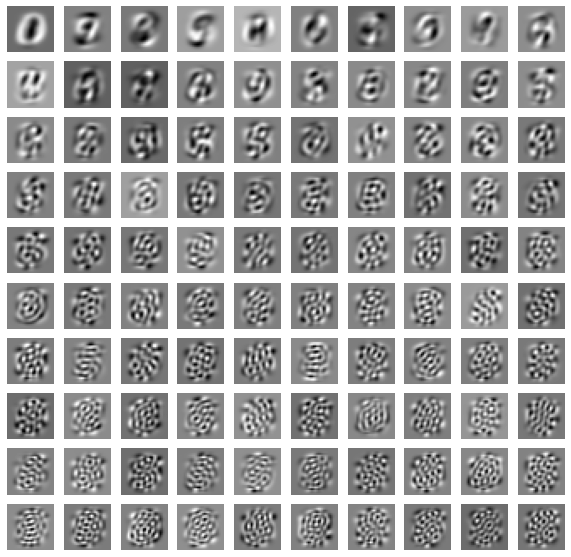

In [27]:
plt.figure(figsize=(10, 10))
for i in range(10*10):
    plt.subplot(10,10,i+1)
    plt.imshow(Vt[i,:].reshape(h,w), cmap=plt.cm.gray)
    plt.axis('off')   

In [29]:
train_y[1]

0

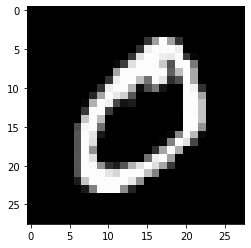

In [31]:
plt.imshow(train_X[1], cmap=plt.cm.gray)

In [32]:
num0 = [i for i in train_y if i==0]

print(f'Found {len(num0)} images of 0')

Found 5923 images of 0


In [ ]:
import random

def show_pics(flist, k):
    plt.figure(figsize=(15, 40))
    for i, row in enumerate(random.sample(flist, k)):
        plt.subplot(1,k,i+1)
        image = train_X[i]
        plt.imshow(image, cmap=plt.cm.gray)
        plt.axis('off')
        
show_pics(watts, 5)